In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Assign artificial data##
Y = np.array([1., -1., -1., 1., 1., 
              -1., -1., 1., 1., -1.,
              -1., -1., 1., 1., 1., 
              -1., -1., -1., 1., 1.])
print("Y=")
print(Y)
##5(X1)+8(X2)+1=0 -> X2= -5/8(X1)-1/8##
X1 = np.random.rand(20)*20-10
print("X1=")
print(X1)
X2 = ( X1*(-5)/8 )-(1/8)
ran = np.random.rand(20)*10
X2[Y==1] = X2[Y==1] + ran[Y==1]
X2[Y==-1] = X2[Y==-1] - ran[Y==-1]
print("X2=")
print(X2)

Y=
[ 1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.
  1.  1.]
X1=
[ 0.86273677  1.95278353  0.40884897 -9.24173262 -5.17493544  1.0044454
 -0.48196925 -8.17183447 -2.03181593 -4.71566364  9.61816019 -6.91724442
  8.22790599 -7.03436403 -8.98604148 -1.583526    9.45780257 -6.1012454
 -8.16632503  5.68038573]
X2=
[ 2.71484479 -7.72935465 -8.10605206 12.30574152 12.78857485 -1.98092994
 -6.24720234  9.79009864  5.97910476 -3.42673609 -7.86801746 -4.28223374
 -3.74978002  9.69776956  8.17309737 -1.77611808 -8.8062944   2.874674
  6.46031691  1.45998363]


In [35]:
##ploting sub_function##
def plot_out(w0,w1,w2):
    ##plot data##
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y==1],X2[Y==1], s=50, c='b', marker="o", label='yn=1')
    plt.scatter(X1[Y==-1],X2[Y==-1], s=50, c='r', marker="x", label='yn=-1')
    
    ##plot f(x) line##
    X2_1_fx,X2_2_fx = ( (-13)*(-5)/8 )-(1/8),( 13*(-5)/8 )-(1/8)
    plt.plot([-13,13],[X2_1_fx,X2_2_fx],'g--', label='f(x)')
    
    ##plot g(x) line & background##
    o_fill_x, o_fill_y = [0, 0, 0, 0], [0, 0, 0, 0]
    x_fill_x, x_fill_y = [0, 0, 0, 0], [0, 0, 0, 0]
    if w2!=0:
        X2_1_fill,X2_2_fill= (-w1*(-15)/w2)-(w0/w2), (-w1*15/w2)-(w0/w2)
        o_fill_x, o_fill_y = [-15,15,15,-15], [X2_1_fill,X2_2_fill,15,15]
        x_fill_x, x_fill_y = [-15,15,15,-15], [X2_1_fill,X2_2_fill,-15,-15]
    plt.fill( o_fill_x, o_fill_y, 'b', alpha = 0.15)
    plt.fill( x_fill_x, x_fill_y, 'r', alpha = 0.15)
    plt.plot([-15,15],[X2_1_fill,X2_2_fill],alpha = 0.4, label='g(x)')
    
    ##fiture settings##
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_title("[w0, w1, w2] = [ "+str(w0)+", "+ str(w1)+", "+ str(w2)+" ]" )
    plt.xlabel("X1")
    plt.ylabel("X2")
    fig.set_size_inches(5,5)
    plt.legend(loc='upper right')

    plt.show()

In [36]:
##perceptron sub_funciton##
def run_perceptron(w0,w1,w2,ite):
    ##check if there is any error
    err = np.where( (Y*(X1*w1+X2*w2+w0))<0 )
    err = err[0]
    if len(err)!=0:
        print(">>error at index=")
        print(err)
        w0 = w0 + Y[err[0]]
        w1 = w1 + Y[err[0]] * X1[err[0]]
        w2 = w2 + Y[err[0]] * X2[err[0]]
        ite=ite+1
        print(">>result after PLA =")
    else:
        print(">>no error")
        
    return [w0,w1,w2,ite]

>>iteration = 0. Perceptron Learning Algorithm starts...


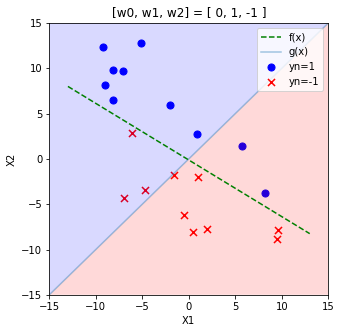

In [37]:
##plot default##
w0,w1,w2 = 0,1,-1
print(">>iteration = 0. Perceptron Learning Algorithm starts...")
plot_out(w0,w1,w2)

>>iteration=1
>>error at index=
[ 0  1  2  3  4  5  6  7  8 10 13 14 15 16 18]
>>result after PLA =


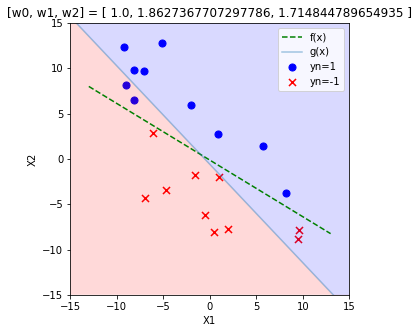

>>iteration=2
>>error at index=
[10 14 16 18]
>>result after PLA =


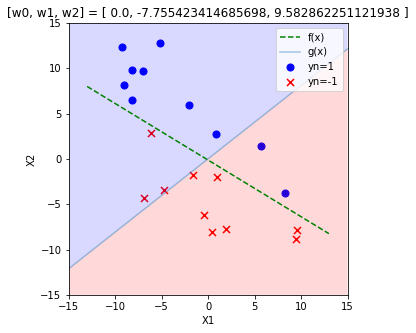

>>iteration=3
>>error at index=
[ 9 11 12 17 19]
>>result after PLA =


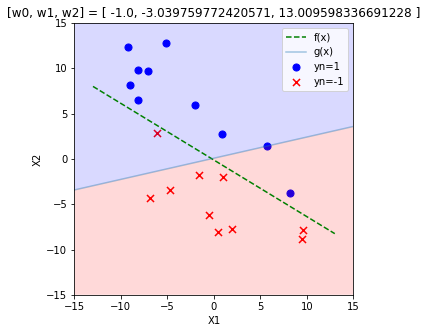

>>iteration=4
>>error at index=
[12 17]
>>result after PLA =


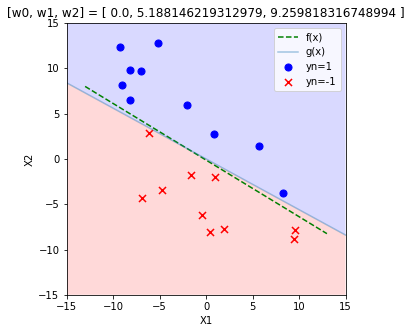

>>iteration=5
>>no error

Perceptron Learning Algorithm done!


In [38]:
##run perceptron##
for i in range(0,1000,1):
    print(">>iteration="+ str(i+1) )
    ret = run_perceptron(w0,w1,w2,i+1)
    w0,w1,w2 = ret[0], ret[1], ret[2]
    if (i+1)==ret[3]:
        break
    plot_out(w0,w1,w2)
        
print("\nPerceptron Learning Algorithm done!")